#### Formação Cientista de Dados
* Regressão Logística

In [1]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


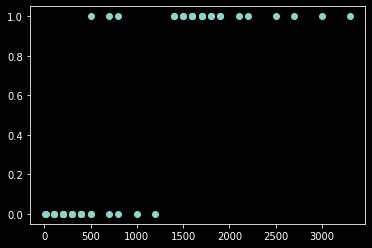

In [2]:
# Carregamento da base de dados
base = pd.read_csv('./Data/Eleicao.csv', sep=';')
# visualização de gráfico com os pontos e visualização de estatísticas
plt.scatter(base.DESPESAS, base.SITUACAO)
base.describe()

In [3]:
# Visualizando o cabeçalho 
base.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


In [4]:
# Visualização o coeficiente de correlação entre o atributo "despesas" e "situação"
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [5]:
# Criação das variáveis X e y (variável independente e variável dependente)
# Transformação de X para o formato de matriz adicionando um novo eixo (newaxis)
X = base.iloc[:, 2].values
X = X[:, np.newaxis]
y = base.iloc[:, 1].values
X

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]], dtype=int64)

In [6]:
# Criação do modelo, treinamento e visualização dos coeficientes
modelo = LogisticRegression()
modelo.fit(X, y)

LogisticRegression()

In [7]:
# Coeficiente Angular e Coeficiente de intercessão
a_coeff = modelo.coef_
l_coeff = modelo.intercept_
# Visualizando os Coeficiente 
print(f'Coeficiente Angular: {a_coeff} \n Coeficiente Linear {l_coeff}')

Coeficiente Angular: [[0.00498364]] 
 Coeficiente Linear [-4.60287217]


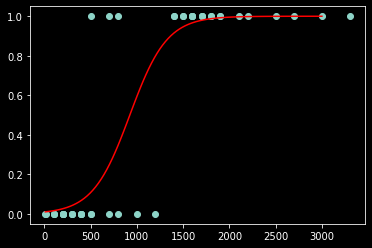

In [8]:
plt.scatter(X, y)
# Geração de novos dados para gerar a função sigmoide
X_teste = np.linspace(10, 3000, 100)
# Implementação da função sigmoide
def model(x):
    return 1 / (1 + np.exp(-x))
# Geração de previsões (variável r) e visualização dos resultados
r = model(X_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(X_teste, r, color = 'red')

In [10]:
# Carregamento da base de dados com os novos candidatos
base_previsoes = pd.read_csv('./Data/NovosCandidatos.csv', sep = ';')

In [11]:
# Visualizando
base_previsoes.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


In [12]:
# Mudança dos dados para formato de matriz
despesas = base_previsoes.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)
# Previsões e geração de nova base de dados com os valores originais e as previsões
previsoes_teste = modelo.predict(despesas)
previsoes_teste

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [13]:
# Adicionado a previsões no conjunto de dados
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))
base_previsoes

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)